In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
stds = 0
for file in ['prices_round_3_day_1', 'prices_round_3_day_0', 'prices_round_3_day_2']:
    data = pd.read_csv(f'{file}.csv', delimiter=';')
    df = data[data['product']=='GIFT_BASKET']
    std = df['mid_price'].std()
    stds += std
    print(std)
print(stds/3)

156.4812900977464
162.74530568852015
372.61117925726313
230.61259168117658


In [6]:
np.sqrt(74**2 + 68**2 + 142**2) / 3

57.98850460795369

                     chocolate_price  strawberry_price  rose_price  \
chocolate_price             1.000000         -0.601645    0.318618   
strawberry_price           -0.601645          1.000000   -0.076760   
rose_price                  0.318618         -0.076760    1.000000   
basket_actual_price         0.729951         -0.084590    0.598447   

                     basket_actual_price  
chocolate_price                 0.729951  
strawberry_price               -0.084590  
rose_price                      0.598447  
basket_actual_price             1.000000  


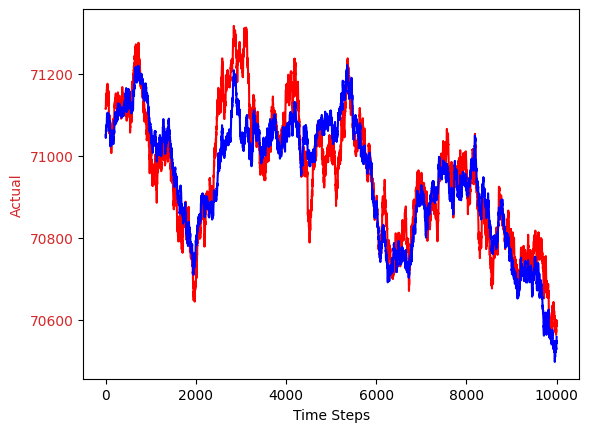

                     chocolate_price  strawberry_price  rose_price  \
chocolate_price             1.000000         -0.235760   -0.159076   
strawberry_price           -0.235760          1.000000   -0.496516   
rose_price                 -0.159076         -0.496516    1.000000   
basket_actual_price         0.119245          0.312178    0.433837   

                     basket_actual_price  
chocolate_price                 0.119245  
strawberry_price                0.312178  
rose_price                      0.433837  
basket_actual_price             1.000000  


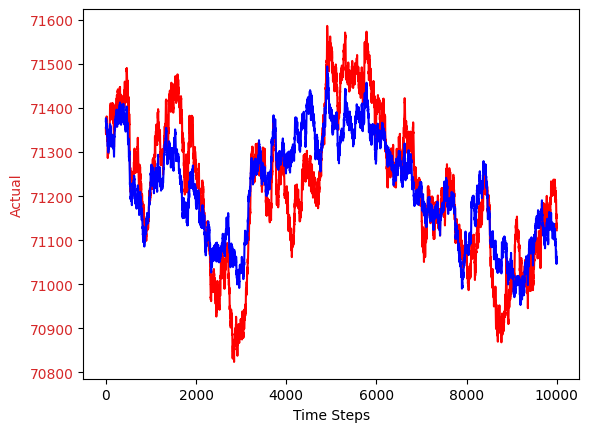

                     chocolate_price  strawberry_price  rose_price  \
chocolate_price             1.000000          0.688411    0.788094   
strawberry_price            0.688411          1.000000    0.433015   
rose_price                  0.788094          0.433015    1.000000   
basket_actual_price         0.941853          0.824438    0.773739   

                     basket_actual_price  
chocolate_price                 0.941853  
strawberry_price                0.824438  
rose_price                      0.773739  
basket_actual_price             1.000000  


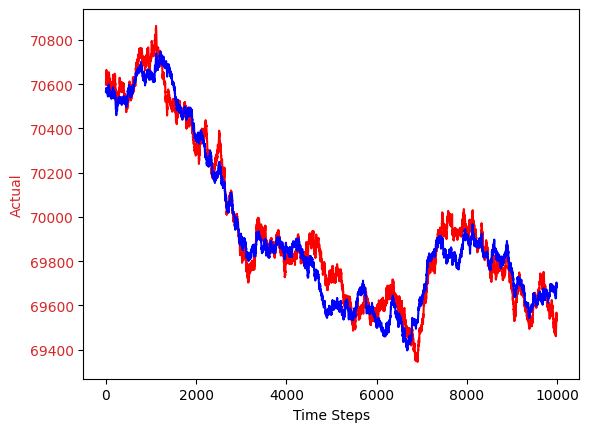

([65.75056902029554, 85.2931783102648, 76.07258670468813],
 [11.9418, 0.2306, 16.29905])

In [21]:
stds = []
means = []
for file in ['prices_round_3_day_1', 'prices_round_3_day_0', 'prices_round_3_day_2']:
    data = pd.read_csv(f'{file}.csv', delimiter=';')
    chocolate_prices = data[data['product'] == 'CHOCOLATE'][['timestamp', 'mid_price']].rename(columns={'mid_price': 'chocolate_price'})
    strawberry_prices = data[data['product'] == 'STRAWBERRIES'][['timestamp', 'mid_price']].rename(columns={'mid_price': 'strawberry_price'})
    rose_prices = data[data['product'] == 'ROSES'][['timestamp', 'mid_price']].rename(columns={'mid_price': 'rose_price'})
    basket_prices = data[data['product'] == 'GIFT_BASKET'][['timestamp', 'mid_price']].rename(columns={'mid_price': 'basket_actual_price'})
    
    # Merge dataframes on timestamps
    arbitrage_df = basket_prices.merge(chocolate_prices, on='timestamp', how='left')
    arbitrage_df = arbitrage_df.merge(strawberry_prices, on='timestamp', how='left')
    arbitrage_df = arbitrage_df.merge(rose_prices, on='timestamp', how='left')

    print(arbitrage_df[['chocolate_price', 'strawberry_price', 'rose_price', 'basket_actual_price']].corr())
    
    # Calculate theoretical basket price
    arbitrage_df['basket_theoretical_price'] = (arbitrage_df['strawberry_price'] * 6 + 
                                                arbitrage_df['chocolate_price'] * 4 + 
                                                arbitrage_df['rose_price'] * 1) +370
    
    # Calculate price difference between actual and theoretical basket price
    arbitrage_df['price_difference'] = arbitrage_df['basket_actual_price'] - arbitrage_df['basket_theoretical_price']
    stds.append(arbitrage_df['price_difference'].std())
    means.append(arbitrage_df['price_difference'].mean())
    fig, ax1 = plt.subplots()

    # Plot the first column 'A'.
    color = 'tab:red'
    ax1.set_xlabel('Time Steps')
    ax1.set_ylabel('Actual', color=color)
    ax1.plot(arbitrage_df.index, arbitrage_df['basket_actual_price'], color='red')
    ax1.plot(arbitrage_df.index, arbitrage_df['basket_theoretical_price'], color='blue')
    ax1.tick_params(axis='y', labelcolor=color)

    # Show the plot.
    plt.show()
stds, means

In [15]:
sum(stds)/3

75.70544467841616

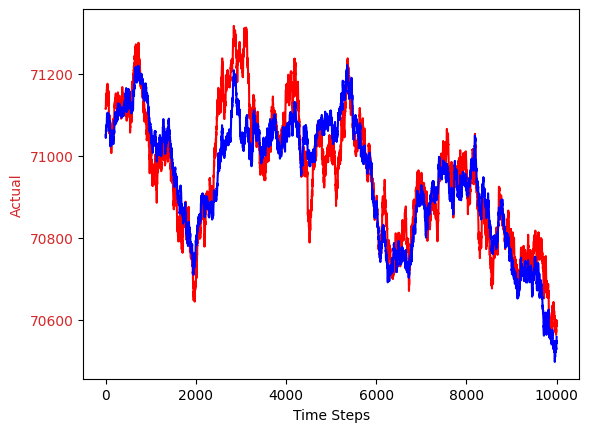

In [14]:
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame and it has two columns 'A' and 'B' you want to plot.

# Create the first figure and axis.
fig, ax1 = plt.subplots()

# Plot the first column 'A'.
color = 'tab:red'
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Actual', color=color)
ax1.plot(arbitrage_df.index, arbitrage_df['basket_actual_price'], color='red')
ax1.plot(arbitrage_df.index, arbitrage_df['basket_theoretical_price'], color='blue')
ax1.tick_params(axis='y', labelcolor=color)

# Show the plot.
plt.show()

In [18]:
arbitrage_df.head()

,timestamp,basket_actual_price,chocolate_price,strawberry_price,rose_price,basket_theoretical_price,price_difference
0,0,71114.5,7988.0,4030.5,14545.5,71050.5,64.0
1,100,71114.0,7988.0,4030.5,14543.5,71048.5,65.5
2,200,71115.5,7987.5,4030.0,14543.5,71043.5,72.0
3,300,71123.5,7988.5,4030.0,14541.5,71045.5,78.0
4,400,71132.5,7989.5,4030.0,14547.5,71055.5,77.0


In [19]:
std_bap = arbitrage_df['basket_actual_price'].std()

# Define the trading strategy function
def trading_strategy(row, std_value):
    if row['price_difference'] > 0.5 * std_value:
        return 'short'
    elif row['price_difference'] < -0.5 * std_value:
        return 'long'
    else:
        return 'hold'

# Apply the trading strategy to each row
arbitrage_df['trade_action'] = arbitrage_df.apply(trading_strategy, std_value=std_bap, axis=1)
arbitrage_df

,timestamp,basket_actual_price,chocolate_price,strawberry_price,rose_price,basket_theoretical_price,price_difference,trade_action
0,0,71114.5,7988.0,4030.5,14545.5,71050.5,64.0,hold
1,100,71114.0,7988.0,4030.5,14543.5,71048.5,65.5,hold
2,200,71115.5,7987.5,4030.0,14543.5,71043.5,72.0,hold
3,300,71123.5,7988.5,4030.0,14541.5,71045.5,78.0,hold
4,400,71132.5,7989.5,4030.0,14547.5,71055.5,77.0,hold
...,...,...,...,...,...,...,...,...
9995,999500,70589.5,7883.0,4036.5,14421.0,70542.0,47.5,hold
9996,999600,70599.5,7885.5,4036.5,14418.0,70549.0,50.5,hold
9997,999700,70585.5,7885.5,4035.5,14421.5,70546.5,39.0,hold
9998,999800,70584.5,7887.5,4035.5,14419.0,70552.0,32.5,hold
